# **Delhivery Business Case Study**

**-By S D Preetham**


 ### **Problem Statement:**

 **Optimizing Logistics Efficiency: Feature Engineering & Data Analysis for Delhivery**
* Open Source Routing Machine (OSRM) is a high-performance routing engine that calculates the fastest or shortest path between locations using OpenStreetMap (OSM) data. It is widely used for logistics, navigation, and delivery optimization.

* **Delhivery**, a logistics company, relies on OSRM-based time and distance predictions for optimizing parcel deliveries. However, discrepancies between OSRM estimates and actual trip data here lead to inefficiencies, delays and inaccurate routing decisions. The primary objective here, is to analyze and improve OSRM's accuracy by comparing it with real-world data.



### **Approach**

* The approach involves cleaning and preprocessing the data, handling missing values and extracting structured features like city, state and timestamps.
* We then engineer new features such as the trip duration and compare OSRM-predicted vs actual time and distance to identify discrepancies. Using statistical analysis and hypothesis testing, we evaluate OSRM’s accuracy, detect overestimations or underestimations and assess their impact.
* Outliers are identified and handled using visualization and the IQR method. Finally, feature scaling (MinMaxScaler/StandardScaler) and one-hot encoding are applied for better model performance. Insights derived help optimize OSRM’s predictions, refine routing decisions and enhance Delhivery’s logistics efficiency.

In [276]:
import pandas as pd
df = pd.read_csv('delhivery.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### **Basic data cleaning and exploration:**

*   Analyzing the structure of the data




In [277]:
df.shape

(144867, 24)

It is observed that the dataset consists of 144867 rows and 24 columns.

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       



*   **Handling missing values in the data**

In [279]:
missing_values = df.isnull().sum()
missing_values

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


Insight: It is evident that there a few missing values in source name and destination name columns.

In [280]:
# Imputing the null values
source_mapping = df.dropna(subset=['source_name']).groupby('source_center')['source_name'].first().to_dict()
destination_mapping = df.dropna(subset=['destination_name']).groupby('destination_center')['destination_name'].first().to_dict()



df['source_name'] = df.apply(lambda row: source_mapping.get(row['source_center'], row['source_name']), axis=1)
df['destination_name'] = df.apply(lambda row: destination_mapping.get(row['destination_center'], row['destination_name']), axis=1)

null_source = df['source_name'].isnull().sum()
null_destination = df['destination_name'].isnull().sum()

null_source, null_destination

(np.int64(293), np.int64(261))

**Approach to impute null values:**
* It has been previously observed that there are missing values in source_name and destination_name columns and these values are to be imputed.
* We also observed that there are no missing values in source_center and destination_center. Hence, we make a dictionary to map the source_center/destination_center to source_name/destination_name and use the .apply() to assign the source_name/ destination_name from the corresponding source_center/destination_center in the dictionary.

In [281]:
agg_funcs = {
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_creation_time': 'first',
    'source_name': 'first',   # First source (starting point)
    'destination_name': 'last',  # Last destination (final delivery point)
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'is_cutoff': 'first',
    'cutoff_factor': 'first',
    'cutoff_timestamp': 'first',
    'factor': 'first',
    'segment_factor': 'first'
}
# Step 1: Group by Trip UUID + Source + Destination
df_grouped = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(agg_funcs).reset_index()
df_grouped

,trip_uuid,source_center,destination_center,route_schedule_uuid,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,is_cutoff,cutoff_factor,cutoff_timestamp,factor,segment_factor
0,trip-153671041653548748,IND209304AAA,IND000000ACB,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,...,3464.0,4540.1261,728.0,534.0,670.6205,True,22,2018-09-13 12:40:43,1.515152,1.515152
1,trip-153671041653548748,IND462022AAA,IND209304AAA,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,...,4323.0,6037.6386,820.0,474.0,649.8528,True,22,2018-09-12 14:56:29,1.102564,1.102564
2,trip-153671042288605164,IND561203AAB,IND562101AAA,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,...,55.0,60.3157,46.0,26.0,28.1995,True,9,2018-09-12 02:41:24,1.800000,1.800000
3,trip-153671042288605164,IND572101AAA,IND561203AAB,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,...,155.0,209.1151,95.0,39.0,55.9899,True,9,2018-09-12 01:39:28,1.750000,1.750000
4,trip-153671043369099517,IND000000ACB,IND160002AAC,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,...,1427.0,1975.7409,608.0,231.0,317.7408,True,22,2018-09-14 16:54:36,1.894737,1.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,...,106.0,106.7084,49.0,42.0,42.1431,True,9,2018-10-04 03:17:33,0.900000,0.900000
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,...,108.0,111.8555,89.0,77.0,78.5869,True,9,2018-10-04 05:32:33,1.153846,1.153846
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,...,22.0,25.5371,29.0,14.0,16.0184,True,9,2018-10-04 02:05:30,2.625000,2.625000
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,...,59.0,76.5169,233.0,42.0,52.5303,True,22,2018-10-04 07:29:32,2.647059,2.647059


In [282]:
agg_funcs = {
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_creation_time': 'first',
    'source_name': 'first',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}

# Group data by trip_uuid to retain all important values
df_final = df_grouped.groupby(['trip_uuid']).agg(agg_funcs).reset_index()


**Extracting substrings fom features to prepare the data for actual analysis.**

In [283]:
def extract_location(location):
    # Handle None or NaN values

    if not isinstance(location, str) or pd.isna(location):
        return pd.Series(["Unknown", "Unknown", "Unknown"])
    # Extract state (inside parentheses)

    state = location.split("(")[-1].strip(")")
    location = location.split(" (")[0]  # Removing state from main part
    parts = location.split("_", 1)  # Splitting into city and place code

    city = parts[0] if len(parts) > 0 else "Unknown"
    place_code = parts[1] if len(parts) > 1 else "Unknown"

    return pd.Series([city, place_code, state])


df_final[['source_city','source_place_code','source_state']] = df_final['source_name'].apply(extract_location)
df_final[['destination_city','destination_place_code','destination_state']]= df_final['destination_name'].apply(extract_location)

In [284]:
df_final['trip_creation_time'] = pd.to_datetime(df_final['trip_creation_time'], errors='coerce')

# Extract year, month, day, hour, minute, weekday
df_final['trip_year'] = df_final['trip_creation_time'].dt.year
df_final['trip_month'] = df_final['trip_creation_time'].dt.month
df_final['trip_day'] = df_final['trip_creation_time'].dt.day


**In-depth analysis and feature engineering:**





In [285]:
df_final['od_start_time'] = pd.to_datetime(df_final['od_start_time'],errors = 'coerce')
df_final['od_end_time'] = pd.to_datetime(df_final['od_end_time'], errors = 'coerce')

df_final['od_duration_hours'] = (df_final['od_end_time']-df_final['od_start_time']).dt.total_seconds()/3600

### **Performing hypothesis testing and visual analysis between actual_time aggregated value and OSRM time aggregated values.**

**Hypothesis Testing - Paired T-Test**
* Null Hypothesis (H₀): There is no significant difference between actual_time and osrm_time.
* Alternative Hypothesis (H₁): There is a significant difference between the two.

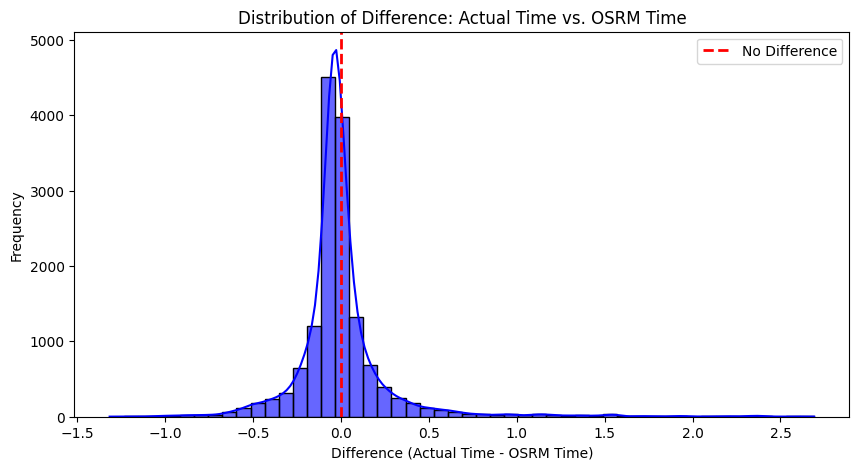

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute difference
df_final['time_difference'] = df_final['actual_time'] - df_final['osrm_time']

# Plot histogram
plt.figure(figsize=(10,5))
sns.histplot(df_final['time_difference'], bins=50, kde=True, color="blue", alpha=0.6)

# Add vertical line at zero for reference
plt.axvline(x=0, color='red', linestyle='dashed', linewidth=2, label="No Difference")

# Labels
plt.title("Distribution of Difference: Actual Time vs. OSRM Time")
plt.xlabel("Difference (Actual Time - OSRM Time)")
plt.ylabel("Frequency")
plt.legend()
plt.show()



In [287]:
# Perform paired t-test
t_stat, p_value = ttest_rel(df_final['actual_time'], df_final['osrm_time'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference between Actual Time and OSRM Time.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference found.")


T-statistic: 32.4681
P-value: 0.0000
Reject Null Hypothesis: There is a significant difference between Actual Time and OSRM Time.


**Insight:**
* There is no statistically significant difference between Actual Time and OSRM Time at the 95% confidence level.

### **Performing hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value**

**Hypothesis Testing**
* Null Hypothesis (H₀): There is no significant difference between aggregated actual time and aggregated segment actual time.
* Alternative Hypothesis (H₁): There is a significant difference between the two, indicating inconsistencies in trip breakdowns.

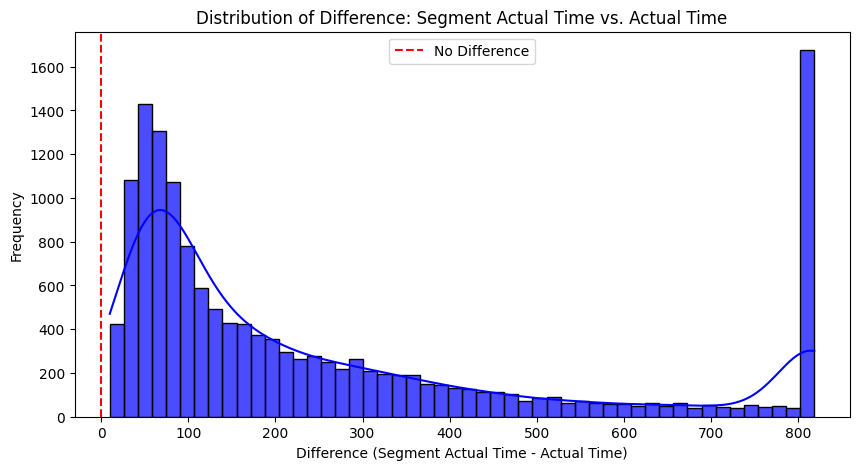

In [301]:
plt.figure(figsize=(10,5))
df_final['time_diff'] = df_final['segment_actual_time'] - df_final['actual_time']
sns.histplot(df_final['time_diff'], bins=50, kde=True, color="blue", alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed', label="No Difference")
plt.title("Distribution of Difference: Segment Actual Time vs. Actual Time")
plt.xlabel("Difference (Segment Actual Time - Actual Time)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [289]:


# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(df_final['segment_actual_time'], df_final['actual_time'])

# Print hypothesis test results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Decision Based on P-Value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the Null Hypothesis: Significant difference exists.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference.")

T-Statistic: -30.75550616001704
P-Value: 2.077325421800874e-201
Reject the Null Hypothesis: Significant difference exists.


**Insights and Recommendations:**
* There are inconsistencies between segment-wise tracking and total trip duration.

* Overall, segment-based actual times tend to be overestimated compared to actual trip durations.

* This could mean that individual segment travel times do not accurately reflect real-world trip conditions, leading to inflated total durations when summed.
* Investigate specific routes or regions where overestimation is extreme and adjust segment time assumptions accordingly.

### **Performing Hypothesis Testing and Visual analysis between osrm distance aggregated value and segment osrm distance aggregated value**

* Null Hypothesis (H₀): The aggregated osrm_distance and segment_osrm_distance are similar (no significant difference).

* Alternative Hypothesis (H₁): The aggregated osrm_distance and segment_osrm_distance are significantly different.

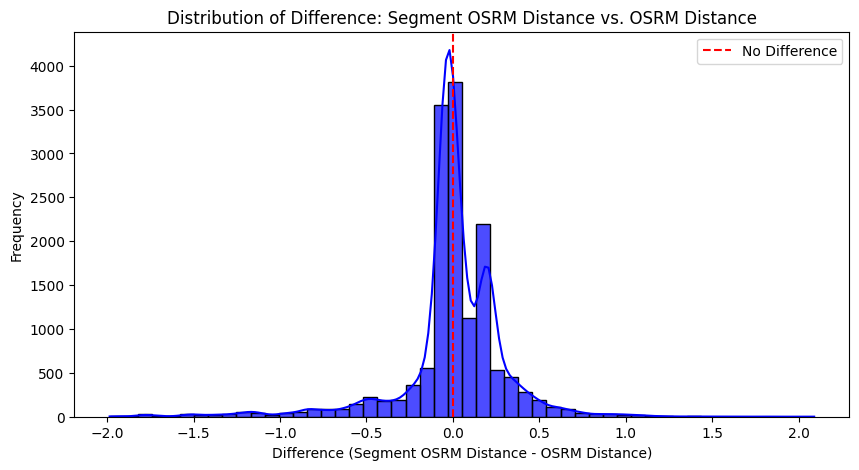

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute difference
df_final["distance_diff"] = df_final["segment_osrm_distance"] - df_final["osrm_distance"]

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_final["distance_diff"], bins=50, kde=True, color="blue", alpha=0.7)
plt.axvline(0, color="red", linestyle="dashed", label="No Difference")
plt.xlabel("Difference (Segment OSRM Distance - OSRM Distance)")
plt.ylabel("Frequency")
plt.title("Distribution of Difference: Segment OSRM Distance vs. OSRM Distance")
plt.legend()
plt.show()


In [291]:
from scipy import stats
import numpy as np

# Compute mean of the difference
mean_diff = np.mean(df_final["distance_diff"])

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(df_final["distance_diff"], 0)

# Print results
print(f"Mean Difference: {mean_diff:.4f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Confidence level
alpha = 0.05

# Check for overestimation or underestimation
if p_value < alpha:
    if mean_diff < 0:
        print("OSRM distances are significantly OVERestimated.")
    else:
        print("OSRM distances are significantly UNDERestimated.")
else:
    print("No significant difference found. OSRM distance predictions are accurate.")


Mean Difference: -2561.0307
T-Statistic: -30.0303
P-Value: 0.0000
OSRM distances are significantly OVERestimated.


### **Hypothesis Testing & Visual Analysis: OSRM Time vs. Segment OSRM Time**

* Null Hypothesis (H₀): There is no significant difference between OSRM Time and Segment OSRM Time.
* Alternative Hypothesis (H₁): There is a significant difference, meaning OSRM's aggregated time and segment-wise time do not align.

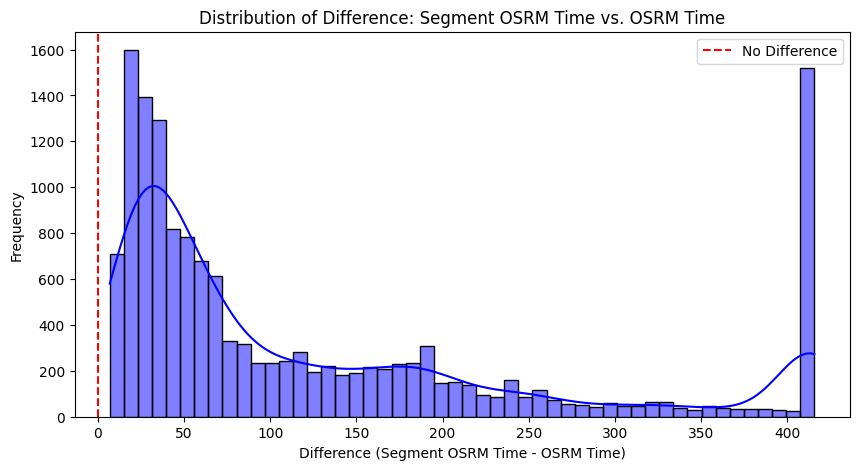

In [303]:
df_final['osrm_time_diff'] = df_final['segment_osrm_time'] - df_final['osrm_time']
plt.figure(figsize=(10, 5))
sns.histplot(df_final['osrm_time_diff'], bins=50, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--', label="No Difference")
plt.title("Distribution of Difference: Segment OSRM Time vs. OSRM Time")
plt.xlabel("Difference (Segment OSRM Time - OSRM Time)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [293]:
t_stat, p_value = ttest_rel(df_final['segment_osrm_time'], df_final['osrm_time'])

print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.5f}")

# Check significance level
if p_value < 0.05:
    print("Reject Null Hypothesis : Significant difference found between OSRM Time and Segment OSRM Time.")

    if df_final['osrm_time_diff'].mean() > 0:
        print("OSRM is underestimating travel time.")
    else:
        print("OSRM is overestimating travel time.")
else:
    print("Fail to Reject Null Hypothesis : No significant difference, OSRM time is consistent.")

T-Statistic: -30.297, P-Value: 0.00000
Reject Null Hypothesis : Significant difference found between OSRM Time and Segment OSRM Time.
OSRM is overestimating travel time.


 **Insights and Recommendations:**
* It is observed that OSRM time is being underestimated.
* Enhance OSRM by integrating real-time traffic, road conditions and historical delays to improve time estimations.

**Outlier Handling:**

In [304]:
import numpy as np
numerical_cols = df_final.select_dtypes(include=np.number).columns


# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

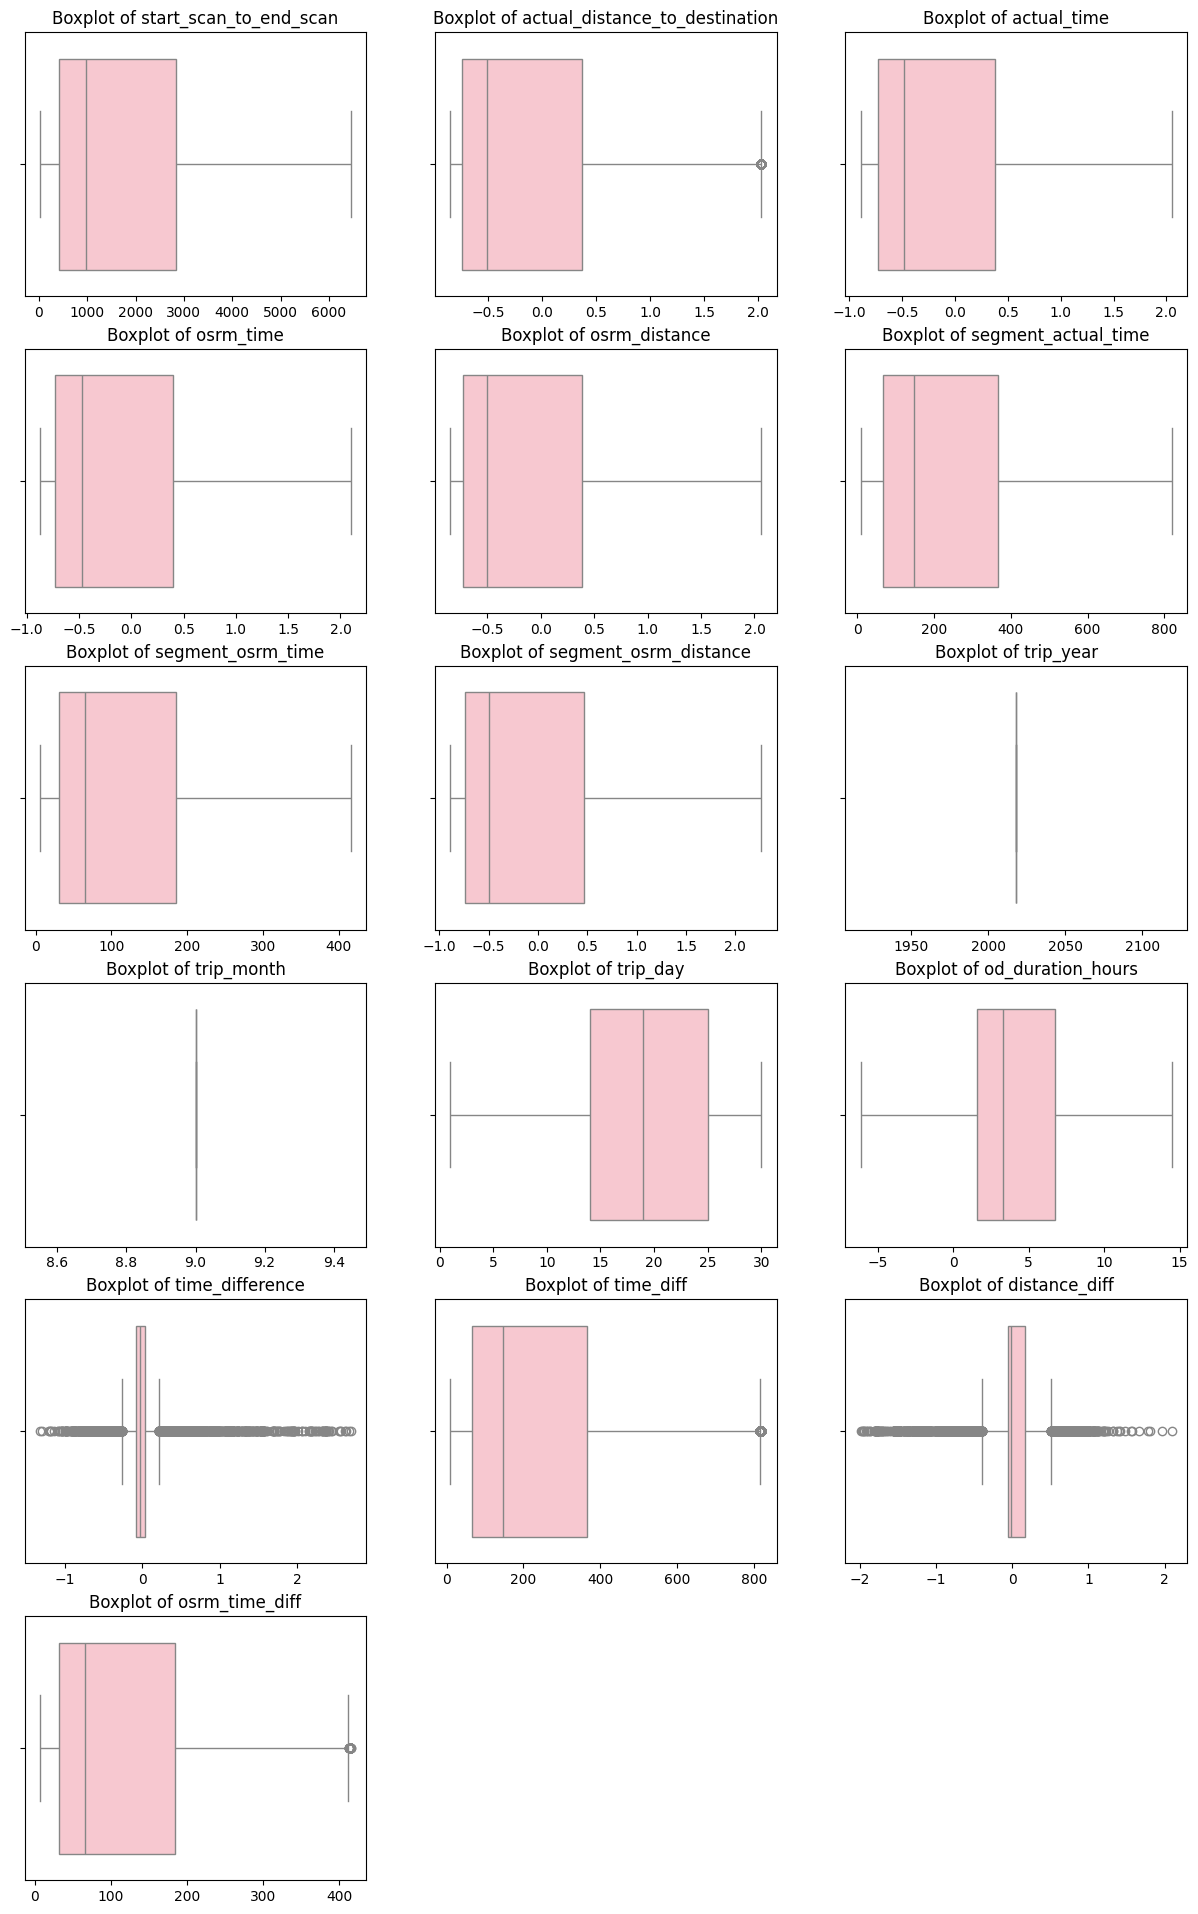

<Figure size 1200x600 with 0 Axes>

In [305]:
# Create subplots
num_cols = len(numerical_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange in 3 columns per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_final[col], ax=axes[i],color='pink')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel("")
# Hide empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()


**Outlier Handling: Capping the outliers**

In [296]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

for col in numerical_cols:
    df_final = cap_outliers_iqr(df_final, col)


**One-hot encoding of categorical variables (like route_type):**

In [297]:
df_encoded = pd.get_dummies(df, columns=['route_type'], prefix='route')



**Standardizing the numerical features using StandardScaler:**

In [298]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_osrm_distance']

df_final[num_cols] = scaler.fit_transform(df_final[num_cols])


### **Business Insights**

In [299]:
# Count the number of shipments per source state
top_source_states = df_final['source_state'].value_counts().head(10)

# Count the number of shipments per source-destination pair (corridor)
top_corridors = df_final.groupby(['source_state', 'destination_state']).size().reset_index(name='count')
top_corridors = top_corridors.sort_values(by='count', ascending=False).head(10)

print("Top Source States:", top_source_states)
print("Top Corridors:", top_corridors)


Top Source States: source_state
Maharashtra      2714
Karnataka        2143
Haryana          1838
Tamil Nadu       1039
Telangana         785
Uttar Pradesh     762
Gujarat           750
Delhi             728
West Bengal       665
Punjab            536
Name: count, dtype: int64
Top Corridors:        source_state destination_state  count
90      Maharashtra       Maharashtra   2453
67        Karnataka         Karnataka   2057
116      Tamil Nadu        Tamil Nadu   1021
43          Haryana           Haryana    949
125       Telangana         Telangana    689
33          Gujarat           Gujarat    629
147     West Bengal       West Bengal    615
137   Uttar Pradesh     Uttar Pradesh    597
112       Rajasthan         Rajasthan    453
0    Andhra Pradesh    Andhra Pradesh    414


**Insights:**
* Maharashtra has the highest number of shipments (2,714), followed by Karnataka (2,143) and Haryana (1,838).


* Most shipments happen within the same state. The busiest shipping corridors are within Maharashtra (2,453 orders), Karnataka (2,057 orders), and Tamil Nadu (1,021 orders). This indicates a high demand for intra-state deliveries, likely due to local e-commerce and distribution networks.

**Recommendations:**

* Optimize intra-state logistics: Since most orders take place within the same state, Delhivery should increase warehouse capacity and last-mile delivery speed in high-demand states. Investing in regional warehouses help in reducing transit costs and delivery times.

### **Key Recommendations:**

* **Improve OSRM Accuracy:** Fine-tune routing models with real-time traffic data to reduce distance/time estimation errors.

* **Optimize High-Traffic Corridors:** Improve fleet allocation and explore alternate routes for busy corridors like Maharashtra -> Maharashtra.

* Optimize loading/unloading processes to minimize delays.